In [ ]:
import pandas as pd

Dataset is loaded into runtime

In [ ]:
df=pd.read_csv("/content/homework01_text_data_group23.csv")

In [ ]:
df

,reviews,class
0,"Point your finger at any item on the menu, ord...",1
1,I have never had such bland food which surpris...,0
2,Must have been an off night at this place.,0
3,"Similarly, the delivery man did not say a word...",0
4,I vomited in the bathroom mid lunch.,0
...,...,...
995,It wasn't busy at all and now we know why.,0
996,I don't know what the big deal is about this p...,0
997,The shrimp tender and moist.,1
998,I'm not sure how long we stood there but it wa...,0


In [ ]:
df.shape

(1000, 2)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

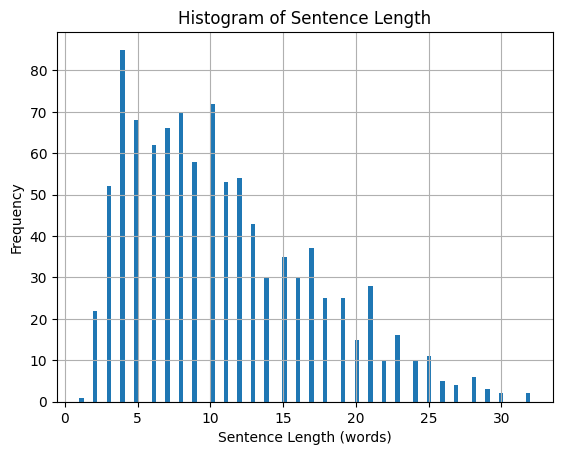

In [ ]:
words_per_sentence = df.reviews.apply(lambda x: len(x.split(" ")))
words_per_sentence.hist(bins=100)

plt.xlabel("Sentence Length (words)")
plt.ylabel("Frequency")
plt.title("Histogram of Sentence Length")
plt.show()

In [ ]:
print("Average words:",words_per_sentence.mean())
print("Skewness:",words_per_sentence.skew())

Average words: 10.894
Skewness: 0.7835013485395653


In [ ]:
from wordcloud import WordCloud

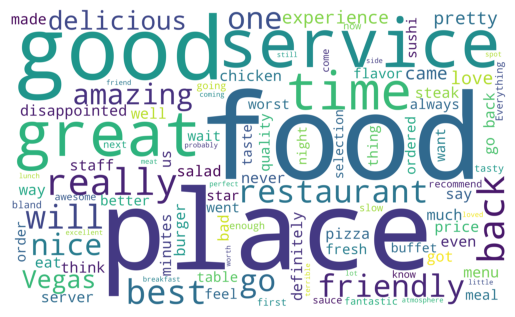

In [ ]:
word_cloud_text = ''.join(df['reviews'])

wordcloud = WordCloud(max_font_size=119, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 15, # Scaling between computation and drawing
                      width=500, # Width of the canvas
                      height=300 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud,
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

## Pre-Processing


* Converting words to lower/upper case
* Removing special characters
* Removing stopwords and high
* low-frequency words
* Stemming/lemmatization item




In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text  import TfidfVectorizer
from collections import Counter

<b>1.Converting words to lower/upper case</b>

In [ ]:
df["reviews_sentence_new"]=df["reviews"].str.lower()

## Tokenizing

In [ ]:
token_lists = [word_tokenize(each) for each in df['reviews']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

# For reviews converted to lower case
token_lists_lower = [word_tokenize(each) for each in df['reviews_sentence_new']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

Number of unique tokens then:  2352
Number of unique tokens now:  2080


<b> 2.Removing Special Characters </b>

In [ ]:
spl_chars=df["reviews_sentence_new"].apply(lambda review:
                                                 [char for char in list(review) if not char.isalnum() and char != ' '])
## Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

## Unique special characters
set(flat_list)

{'!',
 '"',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '?'}

In [ ]:
reviews_backup =df["reviews_sentence_new"].copy()
df["reviews_sentence_new"]=df["reviews_sentence_new"].str.replace(r'[^A-Za-z0-9 ]+', ' ')

<ipython-input-274-6058b123d78f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["reviews_sentence_new"]=df["reviews_sentence_new"].str.replace(r'[^A-Za-z0-9 ]+', ' ')


In [ ]:
# reviews_backup

In [ ]:
df

,reviews,class,reviews_sentence_new
0,"Point your finger at any item on the menu, ord...",1,point your finger at any item on the menu ord...
1,I have never had such bland food which surpris...,0,i have never had such bland food which surpris...
2,Must have been an off night at this place.,0,must have been an off night at this place
3,"Similarly, the delivery man did not say a word...",0,similarly the delivery man did not say a word...
4,I vomited in the bathroom mid lunch.,0,i vomited in the bathroom mid lunch
...,...,...,...
995,It wasn't busy at all and now we know why.,0,it wasn t busy at all and now we know why
996,I don't know what the big deal is about this p...,0,i don t know what the big deal is about this p...
997,The shrimp tender and moist.,1,the shrimp tender and moist
998,I'm not sure how long we stood there but it wa...,0,i m not sure how long we stood there but it wa...


<b> 3.Removing Stop Words </b>

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

print('Available languages for NLTK v.3.4.5: ')
print(stopwords.fileids())

Available languages for NLTK v.3.4.5: 
['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [ ]:
noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stop_words = set(eng_stop_words)
without_stop_words = []
stopword = []
sentence = df['reviews_sentence_new'][0]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print('-- Original Sentence --\n', sentence)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', without_stop_words)

-- Original Sentence --
 point your finger at any item on the menu  order it and you won t be disappointed 

-- Stopwords in the sentence --
 ['your', 'at', 'any', 'on', 'the', 'it', 'and', 'you', 'won', 't', 'be']

-- Non-stopwords in the sentence --
 ['point', 'finger', 'item', 'menu', 'order', 'disappointed']


In [ ]:
def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

df['reviews_sentence_nonstop'] = df['reviews_sentence_new'].apply(lambda row: stopwords_removal(stop_words, row))
df

,reviews,class,reviews_sentence_new,reviews_sentence_nonstop
0,"Point your finger at any item on the menu, ord...",1,point your finger at any item on the menu ord...,"[point, finger, item, menu, order, disappointed]"
1,I have never had such bland food which surpris...,0,i have never had such bland food which surpris...,"[never, bland, food, surprised, considering, a..."
2,Must have been an off night at this place.,0,must have been an off night at this place,"[must, night, place]"
3,"Similarly, the delivery man did not say a word...",0,similarly the delivery man did not say a word...,"[similarly, delivery, man, say, word, apology,..."
4,I vomited in the bathroom mid lunch.,0,i vomited in the bathroom mid lunch,"[vomited, bathroom, mid, lunch]"
...,...,...,...,...
995,It wasn't busy at all and now we know why.,0,it wasn t busy at all and now we know why,"[busy, know]"
996,I don't know what the big deal is about this p...,0,i don t know what the big deal is about this p...,"[know, big, deal, place, back, ya]"
997,The shrimp tender and moist.,1,the shrimp tender and moist,"[shrimp, tender, moist]"
998,I'm not sure how long we stood there but it wa...,0,i m not sure how long we stood there but it wa...,"[sure, long, stood, long, enough, begin, feel,..."


<b> 4.Stemming / Lemming </b>

In [ ]:
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lematizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def stemm_terms(row):
    return [lancaster.stem(term) for term in row]
def lemmatize_terms(row):
    return [lemmatizer.lemmatize(term) for term in row]

df['reviews_sentence_stemm'] = df['reviews_sentence_nonstop'].apply(lambda row: stemm_terms(row))
df['reviews_sentence_lemm'] = df['reviews_sentence_nonstop'].apply(lambda row: lemmatize_terms(row))
df

,reviews,class,reviews_sentence_new,reviews_sentence_nonstop,reviews_sentence_stemm,reviews_sentence_lemm
0,"Point your finger at any item on the menu, ord...",1,point your finger at any item on the menu ord...,"[point, finger, item, menu, order, disappointed]","[point, fing, item, menu, ord, disappoint]","[point, finger, item, menu, order, disappointed]"
1,I have never had such bland food which surpris...,0,i have never had such bland food which surpris...,"[never, bland, food, surprised, considering, a...","[nev, bland, food, surpr, consid, artic, read,...","[never, bland, food, surprised, considering, a..."
2,Must have been an off night at this place.,0,must have been an off night at this place,"[must, night, place]","[must, night, plac]","[must, night, place]"
3,"Similarly, the delivery man did not say a word...",0,similarly the delivery man did not say a word...,"[similarly, delivery, man, say, word, apology,...","[simil, delivery, man, say, word, apolog, food...","[similarly, delivery, man, say, word, apology,..."
4,I vomited in the bathroom mid lunch.,0,i vomited in the bathroom mid lunch,"[vomited, bathroom, mid, lunch]","[vomit, bathroom, mid, lunch]","[vomited, bathroom, mid, lunch]"
...,...,...,...,...,...,...
995,It wasn't busy at all and now we know why.,0,it wasn t busy at all and now we know why,"[busy, know]","[busy, know]","[busy, know]"
996,I don't know what the big deal is about this p...,0,i don t know what the big deal is about this p...,"[know, big, deal, place, back, ya]","[know, big, deal, plac, back, ya]","[know, big, deal, place, back, ya]"
997,The shrimp tender and moist.,1,the shrimp tender and moist,"[shrimp, tender, moist]","[shrimp, tend, moist]","[shrimp, tender, moist]"
998,I'm not sure how long we stood there but it wa...,0,i m not sure how long we stood there but it wa...,"[sure, long, stood, long, enough, begin, feel,...","[sur, long, stood, long, enough, begin, feel, ...","[sure, long, stood, long, enough, begin, feel,..."


In [ ]:
df

,reviews,class,reviews_sentence_new,reviews_sentence_nonstop,reviews_sentence_stemm,reviews_sentence_lemm
0,"Point your finger at any item on the menu, ord...",1,point your finger at any item on the menu ord...,"[point, finger, item, menu, order, disappointed]","[point, fing, item, menu, ord, disappoint]","[point, finger, item, menu, order, disappointed]"
1,I have never had such bland food which surpris...,0,i have never had such bland food which surpris...,"[never, bland, food, surprised, considering, a...","[nev, bland, food, surpr, consid, artic, read,...","[never, bland, food, surprised, considering, a..."
2,Must have been an off night at this place.,0,must have been an off night at this place,"[must, night, place]","[must, night, plac]","[must, night, place]"
3,"Similarly, the delivery man did not say a word...",0,similarly the delivery man did not say a word...,"[similarly, delivery, man, say, word, apology,...","[simil, delivery, man, say, word, apolog, food...","[similarly, delivery, man, say, word, apology,..."
4,I vomited in the bathroom mid lunch.,0,i vomited in the bathroom mid lunch,"[vomited, bathroom, mid, lunch]","[vomit, bathroom, mid, lunch]","[vomited, bathroom, mid, lunch]"
...,...,...,...,...,...,...
995,It wasn't busy at all and now we know why.,0,it wasn t busy at all and now we know why,"[busy, know]","[busy, know]","[busy, know]"
996,I don't know what the big deal is about this p...,0,i don t know what the big deal is about this p...,"[know, big, deal, place, back, ya]","[know, big, deal, plac, back, ya]","[know, big, deal, place, back, ya]"
997,The shrimp tender and moist.,1,the shrimp tender and moist,"[shrimp, tender, moist]","[shrimp, tend, moist]","[shrimp, tender, moist]"
998,I'm not sure how long we stood there but it wa...,0,i m not sure how long we stood there but it wa...,"[sure, long, stood, long, enough, begin, feel,...","[sur, long, stood, long, enough, begin, feel, ...","[sure, long, stood, long, enough, begin, feel,..."


## Train_test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df["reviews_sentence_lemm"].apply(lambda x: ' '.join(x))
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

In [ ]:
from joblib import dump
dump(count_vectorizer,"count_vectorizer.joblib")

['count_vectorizer.joblib']

In [ ]:
print("Shape of X_train_bow:", X_train_bow.shape)
print("First 5 elements of y_train_bow:", y_train[:5])

Shape of X_train_bow: (800, 1591)
First 5 elements of y_train_bow: 29     0
535    1
695    1
557    0
836    0
Name: class, dtype: int64


## Model Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time

knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

start_time = time.time()
knn_model.fit(X_train_bow, y_train)
training_time = time.time() - start_time
print("Training time:", training_time, "seconds")

start_time = time.time()
y_pred_knn = knn_model.predict(X_test_bow)
prediction_time = time.time() - start_time
print("Prediction time:", prediction_time, "seconds")

Training time: 0.002952098846435547 seconds
Prediction time: 0.02944779396057129 seconds


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Calculate evaluation metrics for the training set
y_train_pred = knn_model.predict(X_train_bow)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

# Calculate evaluation metrics for the test set
y_test_pred = knn_model.predict(X_test_bow)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')

# For ROC score, KNN doesn't directly provide probability estimates,
# so we'll skip it for this model.

# Print the evaluation metrics
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1_score)

print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1_score)


Training Set Metrics:
Accuracy: 0.78875
Precision: 0.8020429687500001
Recall: 0.78875
F1-score: 0.7866207451531452

Test Set Metrics:
Accuracy: 0.64
Precision: 0.6472671689049022
Recall: 0.64
F1-score: 0.6323152709359605


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logistic_model = LogisticRegression()
logistic_model.fit(X_train_bow, y_train)

y_train_pred = logistic_model.predict(X_train_bow)
y_test_pred = logistic_model.predict(X_test_bow)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')

print("Logistic Regression - Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1_score)

print("\nLogistic Regression - Test Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1_score)


Logistic Regression - Training Set Metrics:
Accuracy: 0.96875
Precision: 0.9688261737793445
Recall: 0.96875
F1-score: 0.9687502441410065

Logistic Regression - Test Set Metrics:
Accuracy: 0.77
Precision: 0.76996992481203
Recall: 0.77
F1-score: 0.7699078525641024


In [ ]:
y_test_pred_0 = logistic_model.predict(X_test_bow[0])

In [ ]:
y_test_pred_0[0]

0

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

logistic_param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'metric': ['euclidean', 'manhattan']}
logistic_grid_search = GridSearchCV(LogisticRegression(), param_grid=logistic_param_grid, cv=10, scoring='accuracy')
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=knn_param_grid, cv=10, scoring='accuracy')


logistic_grid_search.fit(X_train_bow, y_train)
knn_grid_search.fit(X_train_bow, y_train)

best_logistic_model = logistic_grid_search.best_estimator_
best_logistic_params = logistic_grid_search.best_params_
best_knn_model = knn_grid_search.best_estimator_
best_knn_params = knn_grid_search.best_params_

# Evaluate the best models on the test set
logistic_test_accuracy = best_logistic_model.score(X_test_bow, y_test)
knn_test_accuracy = best_knn_model.score(X_test_bow, y_test)

print("Best Logistic Regression Model:", best_logistic_model)
print("Best Logistic Regression Parameters:", best_logistic_params)
print("Logistic Regression Test Accuracy:", logistic_test_accuracy)

# Print the best model and its parameters for KNN
print("\nBest KNN Model:", best_knn_model)
print("Best KNN Parameters:", best_knn_params)
print("KNN Test Accuracy:", knn_test_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Logistic Regression Model: LogisticRegression(C=10)
Best Logistic Regression Parameters: {'C': 10}
Logistic Regression Test Accuracy: 0.735

Best KNN Model: KNeighborsClassifier(metric='manhattan')
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 5}
KNN Test Accuracy: 0.635


In [ ]:
# Using the logistic
y_train_pred_logistic = best_logistic_model.predict(X_train_bow)
y_test_pred_logistic = best_logistic_model.predict(X_test_bow)

#Using the KNN
y_train_pred_knn = best_knn_model.predict(X_train_bow)
y_test_pred_knn = best_knn_model.predict(X_test_bow)

# for the training set using the best Logistic Regression model
train_accuracy_logistic = accuracy_score(y_train, y_train_pred_logistic)
train_precision_logistic = precision_score(y_train, y_train_pred_logistic, average='weighted')
train_recall_logistic = recall_score(y_train, y_train_pred_logistic, average='weighted')
train_f1_score_logistic = f1_score(y_train, y_train_pred_logistic, average='weighted')
train_roc_auc_logistic = roc_auc_score(y_train, best_logistic_model.predict_proba(X_train_bow)[:, 1])

# Calculate evaluation metrics for the test set using the best Logistic Regression model
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)
test_precision_logistic = precision_score(y_test, y_test_pred_logistic, average='weighted')
test_recall_logistic = recall_score(y_test, y_test_pred_logistic, average='weighted')
test_f1_score_logistic = f1_score(y_test, y_test_pred_logistic, average='weighted')
test_roc_auc_logistic = roc_auc_score(y_test, best_logistic_model.predict_proba(X_test_bow)[:, 1])

# for the training set using the best KNN model
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
train_precision_knn = precision_score(y_train, y_train_pred_knn, average='weighted')
train_recall_knn = recall_score(y_train, y_train_pred_knn, average='weighted')
train_f1_score_knn = f1_score(y_train, y_train_pred_knn, average='weighted')
train_roc_auc_knn = roc_auc_score(y_train, best_knn_model.predict_proba(X_train_bow)[:, 1])
# FOr the test set using the best KNN model
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
test_precision_knn = precision_score(y_test, y_test_pred_knn, average='weighted')
test_recall_knn = recall_score(y_test, y_test_pred_knn, average='weighted')
test_f1_score_knn = f1_score(y_test, y_test_pred_knn, average='weighted')
test_roc_auc_knn = roc_auc_score(y_test, best_knn_model.predict_proba(X_test_bow)[:, 1])

In [ ]:
data = {
    "Model": ["Logistic Regression", "KNN"],
    "Training Accuracy": [train_accuracy_logistic, train_accuracy_knn],
    "Training Precision": [train_precision_logistic, train_precision_knn],
    "Training Recall": [train_recall_logistic, train_recall_knn],
    "Training F1-score": [train_f1_score_logistic, train_f1_score_knn],
    "Training ROC AUC": [train_roc_auc_logistic, train_roc_auc_knn],
    "Test Accuracy": [test_accuracy_logistic, test_accuracy_knn],
    "Test Precision": [test_precision_logistic, test_precision_knn],
    "Test Recall": [test_recall_logistic, test_recall_knn],
    "Test F1-score": [test_f1_score_logistic, test_f1_score_knn],
    "Test ROC AUC": [test_roc_auc_logistic, test_roc_auc_knn]
}
df_results = pd.DataFrame(data)
df_results.set_index("Model", inplace=True)
print(df_results)

                     Training Accuracy  Training Precision  Training Recall  \
Model                                                                         
Logistic Regression              0.995            0.995000            0.995   
KNN                              0.795            0.806319            0.795   

                     Training F1-score  Training ROC AUC  Test Accuracy  \
Model                                                                     
Logistic Regression           0.995000          0.999859          0.735   
KNN                           0.793283          0.876521          0.635   

                     Test Precision  Test Recall  Test F1-score  Test ROC AUC  
Model                                                                          
Logistic Regression        0.734973        0.735       0.734821      0.818887  
KNN                        0.642566        0.635       0.626642      0.688920  


In [ ]:
results_data = {
    'Methods': ['Logistic Regression', 'K-nearest Neighbors'],
    'Accuracy': [test_accuracy_logistic, test_accuracy_knn],
    'Precision': [test_precision_logistic, test_precision_knn],
    'Recall': [test_recall_logistic, test_recall_knn],
    'F1-score': [test_f1_score_logistic, test_f1_score_knn],
    'AUC score': [test_roc_auc_logistic, test_roc_auc_knn]
}
evaluation_metrics_results = pd.DataFrame(results_data)
print(evaluation_metrics_results)


               Methods  Accuracy  Precision  Recall  F1-score  AUC score
0  Logistic Regression     0.735   0.734973   0.735  0.734821   0.818887
1  K-nearest Neighbors     0.635   0.642566   0.635  0.626642   0.688920


## Save the model

In [ ]:
from joblib import dump

In [ ]:
logistic_model_path = "logistic_regression_model.joblib"
knn_model_path = "knn_model.joblib"
dump(best_logistic_model, logistic_model_path)
dump(best_knn_model, knn_model_path)
print("Models saved successfully!")

Models saved successfully!


In [ ]:
# ! pip install gradio

In [ ]:
import gradio as gd

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word.lower() for word in tokens]
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = " ".join(tokens)
    transformed_text = count_vectorizer.transform([preprocessed_text])
    return transformed_text

In [ ]:
def predict_sentiment(text, model_name):
    preprocessed_text = preprocess_text(text)
    if model_name == "Logistic Regression":
        prediction = best_logistic_model.predict(preprocessed_text)[0]
        accuracy = logistic_test_accuracy

    elif model_name == "K-nearest Neighbors":
        prediction = best_knn_model.predict(preprocessed_text)[0]
        accuracy = knn_test_accuracy
    else:
        return "Invalid model selection", None
    if prediction==1:
      sentiment="Positive"
      pos_accuracy=accuracy
      neg_accuracy=1-pos_accuracy
    else:
      sentiment="Negative"
      neg_accuracy=accuracy
      pos_accuracy=1-neg_accuracy
    accuracy_dict = {"Positive": pos_accuracy, "Negative": neg_accuracy}

    return accuracy_dict
examples = [["Point your finger at any item on the menu, order it and you won't be disappointed","K-nearest Neighbors"], ["Similarly, the delivery man did not say a word of apology when our food was 45 minutes late.","Logistic Regression"],["I vomited in the bathroom mid lunch.","K-nearest Neighbors"]]


interface = gr.Interface(
    fn=predict_sentiment,
    inputs=[gr.Textbox(lines=7, label="Input Text"),
            gr.Dropdown(["Logistic Regression", "K-nearest Neighbors"], label="Select Model")],
    outputs=gr.Label(dict),
    title="Sentiment Prediction",
    description="Select a model and enter a text to predict the sentiment (positive or negative) and show the accuracy score.",
    examples=examples
)
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e0791b386375652999.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
